<a href="https://colab.research.google.com/github/SabtheCrab/CS-175-Final-Project/blob/master/Copy_of_CS175_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 175 Final Project: Humback Whale Identification**

**Group Member 1:**

Name: Sabrina Will

**Group Member 2:**

Name:

CREDITS FOR BOUNDING BOX CROPPED DATASET: https://www.kaggle.com/josemontiel/humpback-whale-bounding-box-cropped-dataset/output

In [0]:
#We are using a data set, which originally came from the kaggle competition. However, many of the images suffered from misalignment issues and have 
#large amounts of background space we dont need our AI to consider when looking at whale flukes. As such, someone blessed competitors with a
#dataset that reformats all original images and crops out just the whale fluke itself. This is the data we are using in our project. 

from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#navigate to Final Project Directory
%cd /content/drive/My\ Drive/CS\ 175\ Final\ Project

/content/drive/My Drive/CS 175 Final Project


In [0]:
#navigate to data directory, and then test directory within it
%cd  /content/drive/My\ Drive/CS\ 175\ Final\ Project/data/test

/content/drive/My Drive/CS 175 Final Project/data/test


In [0]:
!unzip test_cropped.zip 

Archive:  test_cropped.zip
   creating: output/humpback-whale-identification-cropped/test/
  inflating: output/humpback-whale-identification-cropped/test/ae9c16315.jpg  
  inflating: output/humpback-whale-identification-cropped/test/1aa7b651a.jpg  
  inflating: output/humpback-whale-identification-cropped/test/4fe483e96.jpg  
  inflating: output/humpback-whale-identification-cropped/test/262f5cb0c.jpg  
  inflating: output/humpback-whale-identification-cropped/test/9b7b553e5.jpg  
  inflating: output/humpback-whale-identification-cropped/test/6ced55e1e.jpg  
  inflating: output/humpback-whale-identification-cropped/test/b263dca80.jpg  
  inflating: output/humpback-whale-identification-cropped/test/c55e58d61.jpg  
  inflating: output/humpback-whale-identification-cropped/test/2ccaab956.jpg  
  inflating: output/humpback-whale-identification-cropped/test/6efe562e6.jpg  
  inflating: output/humpback-whale-identification-cropped/test/373fe287f.jpg  
  inflating: output/humpback-whale-ident

In [0]:
#navigate to data directory, and then train directory within it
%cd  /content/drive/My\ Drive/CS\ 175\ Final\ Project/data/train

/content/drive/My Drive/CS 175 Final Project/data/train


In [0]:
!unzip train_cropped.zip 

Archive:  train_cropped.zip
   creating: output/humpback-whale-identification-cropped/train/
  inflating: output/humpback-whale-identification-cropped/train/debd3e310.jpg  
  inflating: output/humpback-whale-identification-cropped/train/63c94de5f.jpg  
  inflating: output/humpback-whale-identification-cropped/train/9ed955c2d.jpg  
  inflating: output/humpback-whale-identification-cropped/train/cf0a3a50b.jpg  
  inflating: output/humpback-whale-identification-cropped/train/7f1d4c51d.jpg  
  inflating: output/humpback-whale-identification-cropped/train/648d1287c.jpg  
  inflating: output/humpback-whale-identification-cropped/train/d5ce06fd9.jpg  
  inflating: output/humpback-whale-identification-cropped/train/d2e6be1e7.jpg  
  inflating: output/humpback-whale-identification-cropped/train/9e7220ca9.jpg  
  inflating: output/humpback-whale-identification-cropped/train/adf47db53.jpg  
  inflating: output/humpback-whale-identification-cropped/train/fd983a0f6.jpg  
  inflating: output/humpbac

In [0]:
%cd /content/drive/My\ Drive/CS\ 175\ Final\ Project/data

/content/drive/My Drive/CS 175 Final Project/data


In [0]:
import copy, cv2, json, os, time, torch, torchvision

from collections import OrderedDict

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd
from PIL import Image
from torch import nn
from torch import optim
from torch.autograd import Variable
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torch.utils.data as data
from torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from torchvision import models
from torchvision import transforms
import torchvision.datasets as datasets

import pandas as pd

import seaborn as sns

df = pd.read_csv('train.csv')
df.head()

Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale

In [0]:
df.columns

Index(['Image', 'Id'], dtype='object')

In [0]:
#credit to: https://github.com/AdityaSidharta/kaggle_humpback_whale/blob/master/humpback_whale.ipynb for plot_images function
def plot_images(filenames, table_size, labels = '', traintest = 'train'):
    imgs_filename = [traintest + '/' + str(filename) for filename in filenames]
    imgs = [plt.imread(filename) for filename in imgs_filename]
    figure = plt.figure(figsize=(20, 10))
    rows, cols = table_size
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if not np.all(labels == ''):
            subplot.set_title(labels[i], fontsize=10)
        subplot.imshow(imgs[i], cmap='gray')
    plt.tight_layout()
    plt.show()

/content/drive/My Drive/CS 175 Final Project/data/train/output/humpback-whale-identification-cropped


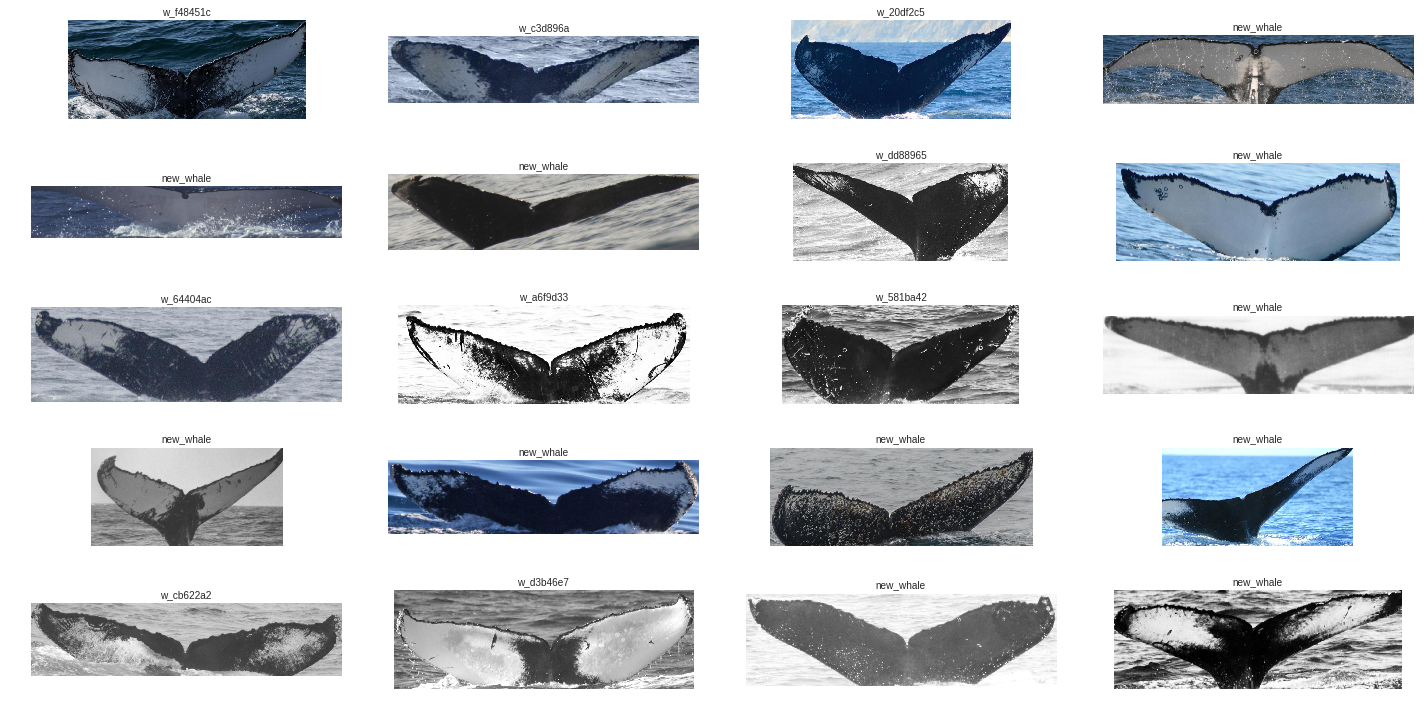

In [0]:
#showing random whale images to make sure i loaded in the data properly
%cd /content/drive/My\ Drive/CS\ 175\ Final\ Project/data/train/output/humpback-whale-identification-cropped/

plot_images(df.Image[:20], (5,4) ,df.Id[:20], 'train')

In [0]:
%cd /content/drive/My\ Drive/CS\ 175\ Final\ Project/data

/content/drive/My Drive/CS 175 Final Project/data


In [0]:
#find number of unique whale individuals

n_unique = len(df['Id'].unique())
img_size = (200, 300, 1)

print ("Number of Unique Categories : " + str(n_unique))

Number of Unique Categories : 5005


In [0]:
n_train = len(df['Id'])
#counts of each unique whale
weight_series = df['Id'].value_counts()
weight_df = pd.DataFrame(weight_series)
weight_df.columns = ['count']
weight_df['count'] = weight_df['count'].astype(float)
weight_df['Id'] = weight_df.index
weight_df = weight_df.reset_index(drop = True)
weight_df['weight'] = n_train / (n_unique * weight_df['count'] )
label_to_idNum = dict(zip(weight_df['Id'], range(n_unique)))
weight_df

count         Id    weight
0     9664.0  new_whale  0.000524
1       73.0  w_23a388d  0.069413
2       65.0  w_9b5109b  0.077956
3       62.0  w_9c506f6  0.081728
4       61.0  w_0369a5c  0.083068
5       57.0  w_700ebb4  0.088897
6       54.0  w_3de579a  0.093836
7       51.0  w_564a34b  0.099356
8       50.0  w_fd3e556  0.101343
9       49.0  w_88e4537  0.103411
10      48.0  w_2b069ba  0.105565
11      47.0  w_d405854  0.107811
12      45.0  w_f0fe284  0.112603
13      45.0  w_789c969  0.112603
14      40.0  w_343f088  0.126678
15      40.0  w_778e474  0.126678
16      40.0  w_5e8e218  0.126678
17      37.0  w_60ce6fc  0.136950
18      37.0  w_a9304b9  0.136950
19      37.0  w_5a2634c  0.136950
20      36.0  w_6822dbc  0.140754
21      35.0  w_af367c3  0.144775
22      34.0  w_1ca9ab1  0.149033
23      34.0  w_f765256  0.149033
24      33.0  w_17b0d3a  0.153549
25      32.0  w_d72771c  0.158348
26      31.0  w_8c25681  0.163456
27      31.0  w_6cda039  0.163456
28      31.0  w_08630fd  0.163456
29      30.0  w_51fc1fc  0.168904
...      ...        ...       ...
4975     1.0  w_641df87  5.067133
4976     1.0  w_016f0ea  5.067133
4977     1.0  w_dee1b17  5.067133
4978     1.0  w_47e88ee  5.067133
4979     1.0  w_0470377  5.067133
4980     1.0  w_10f4afc  5.067133
4981     1.0  w_e244fc3  5.067133
4982     1.0  w_76fab39  5.067133
4983     1.0  w_3404de1  5.067133
4984     1.0  w_5515886  5.067133
4985     1.0  w_0f25e3c  5.067133
4986     1.0  w_0729126  5.067133
4987     1.0  w_fa3a41f  5.067133
4988     1.0  w_cbeade6  5.067133
4989     1.0  w_0a6e626  5.067133
4990     1.0  w_c62ac72  5.067133
4991     1.0  w_11ac036  5.067133
4992     1.0  w_e9605ca  5.067133
4993     1.0  w_c928809  5.067133
4994     1.0  w_2c0cfe8  5.067133
4995     1.0  w_8cce8ce  5.067133
4996     1.0  w_db96784  5.067133
4997     1.0  w_6e77fd0  5.067133
4998     1.0  w_75c7a82  5.067133
4999     1.0  w_b4db669  5.067133
5000     1.0  w_0a0b4c6  5.067133
5001     1.0  w_bf33ddf  5.067133
5002     1.0  w_0e26d1a  5.067133
5003     1.0  w_b72dc3d  5.067133
5004     1.0  w_4857351  5.067133

[5005 rows x 3 columns]

In [0]:
size_buckets = Counter(df['Id'].value_counts().values)

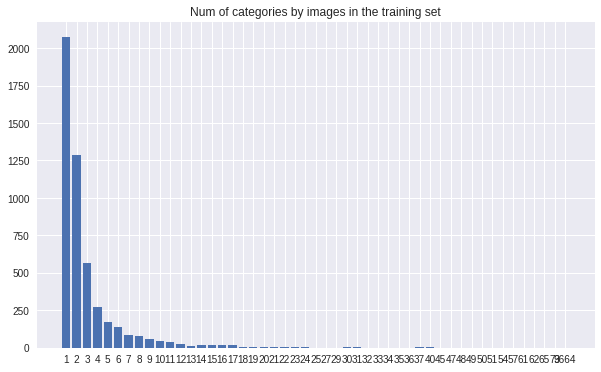

In [0]:
plt.figure(figsize=(10, 6))

plt.bar(range(len(size_buckets)), list(size_buckets.values())[::-1], align='center')
plt.xticks(range(len(size_buckets)), list(size_buckets.keys())[::-1])
plt.title("Num of categories by images in the training set")

plt.show()

Most classes only have a few to one image within them

In [0]:
total = len(df['Id'])
print(f'Total images in training set {total}')

Total images in training set 25361


In [0]:
class HW_Dataset(Dataset):
    def __init__(self,filepath, csv_path, transform=None):
        self.file_path = filepath
        self.df = pd.read_csv(csv_path)
        self.transform = transform
        self.image_list = [x for x in os.listdir(self.file_path)]
        
    def __len__(self):
        return(len(self.image_list))
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.file_path,self.df.Image[idx])
        label = self.df.Id[idx]
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)

        return img, label

def label_to_id(label):
    x = [label_to_idNum[i] for i in label]
    return torch.tensor(x)

# Process a PIL image for use in a PyTorch model
def process_image(image):
    #img_transform = transforms.Compose([
#        transforms.ToTensor()])
    img_transform = transform
    pil_image = Image.open(image)
    pil_image = img_transform(pil_image).float()
    np_image = np.array(pil_image)    
    return np_image

def imshow(image, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots()
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    ax.imshow(image)
    return ax

In [0]:
#old 256
dims = 128

transform = transforms.Compose([
                              transforms.Resize((dims, dims)),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])

dim1 = max(int(dims**2/2),5005)
dim2 = max(int((dims**2)/4),5005)
print(dim1)
print(dim2)

8192
5005


In [185]:
train_dataset = HW_Dataset('train/output/humpback-whale-identification-cropped/train','train.csv', transform)
test_dataset = HW_Dataset('test/output/humpback-whale-identification-cropped/test','train.csv', transform)
print(len(train_dataset.image_list))
print(len(test_dataset.image_list))

25361
7960


In [0]:
train_dataset[0][0].size()

torch.Size([3, 128, 128])

In [0]:
# example
a = list(range(10))
b = list(range(5,15))
np.setdiff1d(a,b) #in a and not in b

array([0, 1, 2, 3, 4])

In [190]:
test_size = .2
n = len(train_dataset)

np.random.seed(0)
a = list(range(n))

train_index = np.random.choice(a,replace=False,size=int(n*(1-test_size)))
test_index = np.setdiff1d(a,train_index)
print(train_index.size)
print(test_index.size)


use_only = .5
train_cut_index = np.random.choice(train_index, replace=False, size=int(train_index.size * use_only))
test_cut_index = np.random.choice(test_index, replace=False, size=int(test_index.size * use_only))
print("cut size:")
print(train_cut_index.size)
print(test_cut_index.size)

20288
5073
cut size:
10144
2536


In [191]:
data_train = copy.deepcopy(train_dataset)
data_train.image_list = [train_dataset.image_list[i] for i in train_cut_index]

data_test = copy.deepcopy(train_dataset)
data_test.image_list = [train_dataset.image_list[i] for i in test_cut_index]

gen_train = DataLoader(data_train,batch_size=16, shuffle=True)
gen_test = DataLoader(data_test,batch_size=16, shuffle=True)
full_train_generator = DataLoader(train_dataset,batch_size=16, shuffle=True)
full_test_generator = DataLoader(test_dataset,batch_size=16, shuffle=True)

print(len(gen_train))
print(len(gen_test))
print(len(full_train_generator))
print(len(full_test_generator))

634
159
1586
498


In [192]:
print(len(train_dataset))
print(len(test_dataset))
print(len(data_train))
print(len(data_test))


25361
7960
10144
2536


In [193]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=5005):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(int(32*dims*dims/4/4), num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

print("Cuda" if torch.cuda.is_available() else "CPU")
  
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = ConvNet(n_unique).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()

Cuda


In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [195]:
epochs = 5
# training_data = full_train_generator
training_data = gen_train

image_count = len(training_data)
progress_printer = 25

for e in range(epochs):
    running_loss, i = 0, 0

    for image, label in training_data:
        label = label_to_id(label)
        image, label = image.to(device), label.to(device)
        i +=1 
        if i % progress_printer == 0:
            print('{:.0f}% complete'.format(i/image_count*100))
        log_ps = model(image)
        loss = criterion(log_ps, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('epoch {}: loss: {}'.format(e,running_loss))

4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
32% complete
35% complete
39% complete
43% complete
47% complete
51% complete
55% complete
59% complete
63% complete
67% complete
71% complete
75% complete
79% complete
83% complete
87% complete
91% complete
95% complete
99% complete
epoch 0: loss: 4964.29655957222
4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
32% complete
35% complete
39% complete
43% complete
47% complete
51% complete
55% complete
59% complete
63% complete
67% complete
71% complete
75% complete
79% complete
83% complete
87% complete
91% complete
95% complete
99% complete
epoch 1: loss: 3010.2784435749054
4% complete
8% complete
12% complete
16% complete
20% complete
24% complete
28% complete
32% complete
35% complete
39% complete
43% complete
47% complete
51% complete
55% complete
59% complete
63% complete
67% complete
71% complete
75% complete
79% complete
83% complete
87% complete
91% 

In [0]:
def testModel(model, testing_data):
    model.eval()
    with torch.no_grad():
      numCorrect = 0
      total = 0
      batch = 0 
      progress_printer = 25
      for image, label in testing_data:
          label = label_to_id(label).to(device)
          image = image.to(device)
          predicted = model(image)
#           top5Pred, top5PredIndices = torch.topk(predicted, 5)
          top5Pred, top5PredIndices = torch.topk(predicted, 1)
          for p in range(len(top5PredIndices)):
              currPred = top5PredIndices[p]
              numCorrect += (label[p] in currPred)
          total += len(label)
          batch += 1
          if (batch % progress_printer == 0):
            print("NumCorrect:", numCorrect, "with total:", total, " (Batch", batch, ")")
      return numCorrect / total

In [204]:
print(len(gen_train))
training_acc = testModel(model, gen_train)
print('Training acc:', training_acc)

634
NumCorrect: 397 with total: 400  (Batch 25 )
NumCorrect: 791 with total: 800  (Batch 50 )
NumCorrect: 1189 with total: 1200  (Batch 75 )
NumCorrect: 1586 with total: 1600  (Batch 100 )
NumCorrect: 1983 with total: 2000  (Batch 125 )
NumCorrect: 2381 with total: 2400  (Batch 150 )
NumCorrect: 2779 with total: 2800  (Batch 175 )
NumCorrect: 3179 with total: 3200  (Batch 200 )
NumCorrect: 3576 with total: 3600  (Batch 225 )
NumCorrect: 3971 with total: 4000  (Batch 250 )
NumCorrect: 4369 with total: 4400  (Batch 275 )
NumCorrect: 4767 with total: 4800  (Batch 300 )
NumCorrect: 5165 with total: 5200  (Batch 325 )
NumCorrect: 5561 with total: 5600  (Batch 350 )
NumCorrect: 5957 with total: 6000  (Batch 375 )
NumCorrect: 6356 with total: 6400  (Batch 400 )
NumCorrect: 6754 with total: 6800  (Batch 425 )
NumCorrect: 7150 with total: 7200  (Batch 450 )
NumCorrect: 7545 with total: 7600  (Batch 475 )
NumCorrect: 7944 with total: 8000  (Batch 500 )
NumCorrect: 8343 with total: 8400  (Batch 5

In [205]:
print(len(gen_test))
test_acc = testModel(model, gen_test)
print('Test acc:', test_acc)

159
NumCorrect: 399 with total: 400  (Batch 25 )
NumCorrect: 793 with total: 800  (Batch 50 )
NumCorrect: 1189 with total: 1200  (Batch 75 )
NumCorrect: 1589 with total: 1600  (Batch 100 )
NumCorrect: 1989 with total: 2000  (Batch 125 )
NumCorrect: 2386 with total: 2400  (Batch 150 )
Test acc: 0.9940851735015773
